In [1]:
# https://www.kaggle.com/c/titanic\

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd 
import scipy as sp 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. 데이터 가져오기

In [2]:
train = pd.read_csv("./Tdataset/train.csv")
test = pd.read_csv("./Tdataset/test.csv")

In [3]:
# Data Dictionary
# Survived: 0 = No, 1 = Yes
# pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic
# ticket: Ticket number
# cabin: Cabin number
# embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# 2. 데이터 정보확인

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test.head(3)  # train 과 동일하나 Survived field(= target) 만 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3. 데이터 분석 (바차트)

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

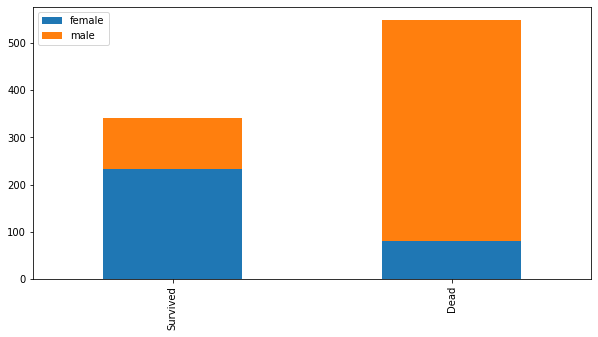

In [13]:
bar_chart('Sex')

#  여성의 생존 확률이 높음

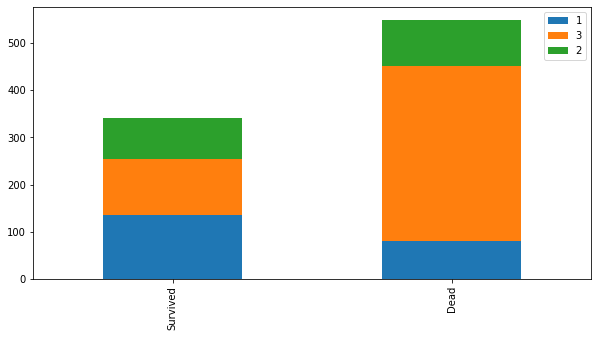

In [14]:
bar_chart('Pclass')

# 1등급 > 2등급 > 3등급 순으로 생존 확률이 높음

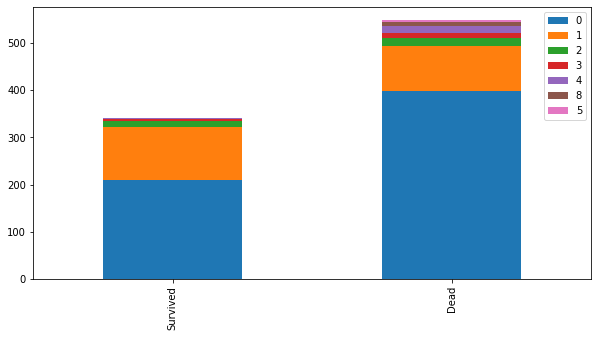

In [15]:
bar_chart('SibSp')

#  가족과 탄 경우 생존 확률이 높음

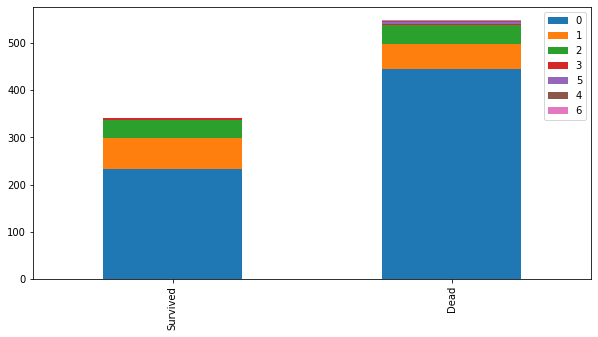

In [16]:
bar_chart('Parch')

#  가족과 탄 경우 생존 확률이 높음

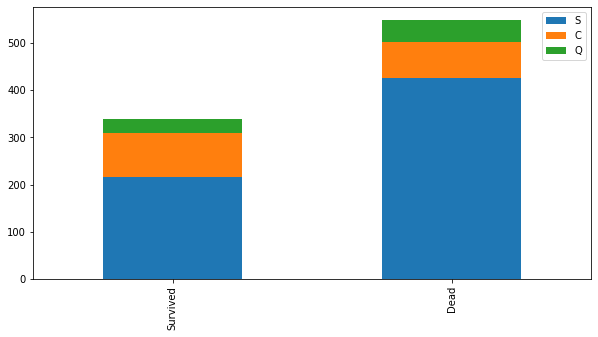

In [17]:
bar_chart('Embarked')

#  가설을 세우기에는 부족

# 4. Feature Engineering

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_test_data = [train, test] # train + test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [20]:
train['Title'].replace(['Mr','Miss','Mrs','Master','Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'],[0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3],inplace=True)
test['Title'].replace(['Mr','Miss','Mrs','Master','Dr','Rev','Mlle','Major','Col','Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'],[0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3],inplace=True)

In [21]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

0       240
1        78
2        72
3        27
Dona      1
Name: Title, dtype: int64

## 4.1 Mr./Ms./Mrs.

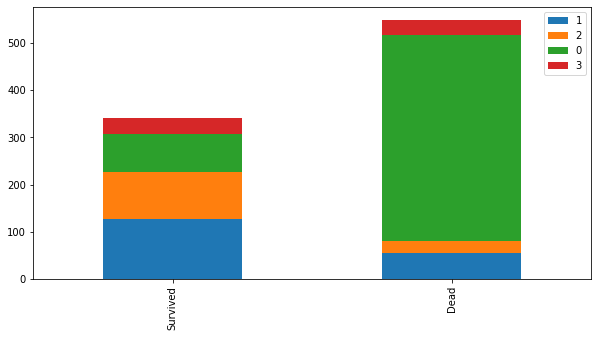

In [23]:
bar_chart('Title')

# MR  - 생존확률 낮음
# MS/MRS - 상대적으로 생존확률 높음

## 4.2 Sex numerical

In [24]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Sex'].replace(['male','female'],[0,1],inplace=True)

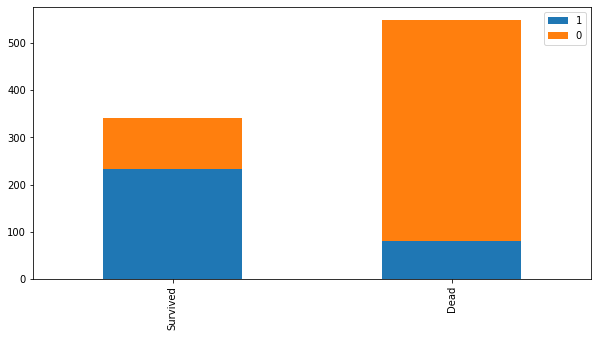

In [25]:
bar_chart('Sex')

## 4.3 Age

### 4.3.1  Nan 값 처리

In [26]:
# Title (Mr, Mrs, Miss, Others) 별 중앙값으로 Null 값 처리
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

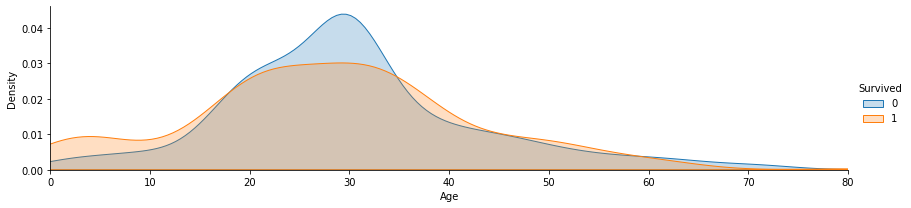

In [27]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

### 4.3.2  나이 -> 연령대별 구분

In [28]:
#      ['Age'] <=16: 0
# 16 < ['Age'] <=26: 1
# 26 < ['Age'] <=36: 2
# 36 < ['Age'] <=62: 3
# 62 < ['Age']     : 4

In [30]:
for dataset in train:
    dataset.loc[ train['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(train['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(train['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(train['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ train['Age'] > 62, 'Age'] = 4

AttributeError: 'str' object has no attribute 'loc'

In [ ]:
bar_chart('Age')

## 4.4 Embarked

<AxesSubplot:>

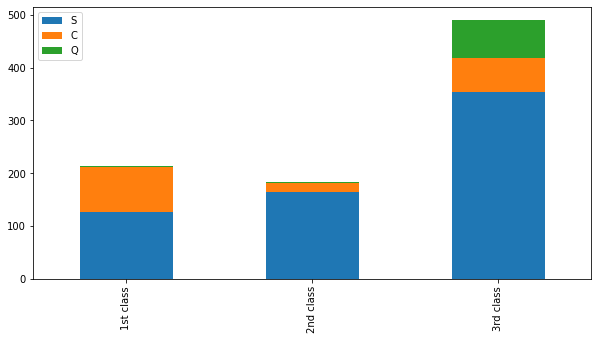

In [33]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

# Q에서 탄 사람들은 대부분 3등급 칸
# S에서 탄 사람들이 1,2,3 등급 칸의 50% 이상 ==>  null 값은 S 처리

In [34]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 4.5 Fare

In [38]:
# 각 Pclass 의 중앙값으로 Null 값처리
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [39]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

ValueError: Must have equal len keys and value when setting with an iterable

## 4.6 Cabin

In [41]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64